# Задача 4

In [18]:
%matplotlib inline
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import *

In [19]:
data = np.loadtxt('6.csv', delimiter=',', skiprows=3)
print(len(data))

1000


Для $Exp(\theta)$ априорное распределение $\Gamma(\alpha_0, \beta_0)$ with mean = $\frac{\alpha_0}{\beta_0}$.

Байесовская оценка для параметра $\theta$: $\theta^* = \frac{\alpha_0 + n}{\beta_0 + \sum_{i=1}^n x_i}.$

In [20]:
def BayesEst(x, alpha, beta):
    # Байесовская оценка для экспоненциального распределения
    return (alpha + len(x))/(beta + sum(x))

Задача состоит в том, чтобы верно подобрать параметры $\alpha_0 \: и \: \beta_0$.

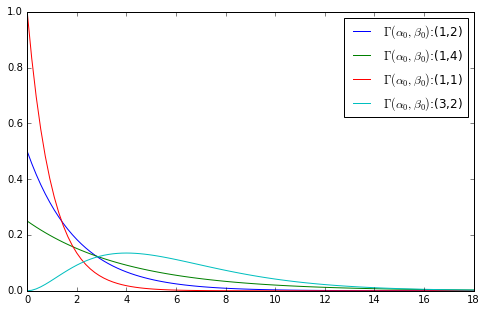

In [21]:
x = linspace(0,18,100)
params = [(1,2),(1,4),(1,1),(3,2)]
figure(figsize=(8,5))
for p in params:
    plot(x, gamma.pdf(x, p[0], scale=p[1]), \
         label='$\Gamma(\\alpha_0,\\beta_0)$:({},{})'.format(p[0], p[1]))
legend()
show()

Поскольку в начальный момент времени мы ничего не знаем о "скорости выхода из строя" серверов, то нам не подходят параметры Гамма распределения, при которых образуется явный "горб" над каким-то конкретным числом. Нам следует этого избегать.

Значит, нужно брать параметр $\alpha_0 = 1$, а за параметр $\beta_0$ можно взять число 2, при котором график плотности выглядит не очень крутым.

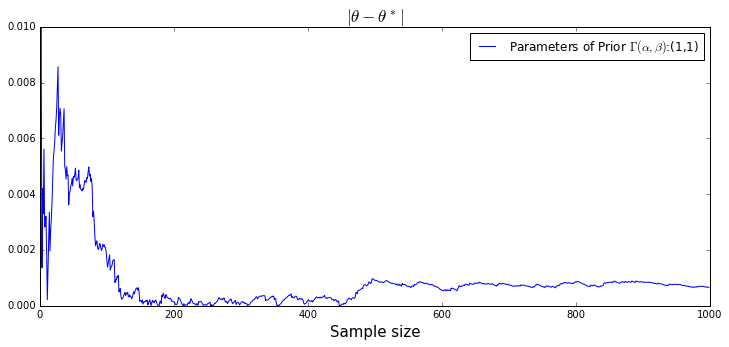

In [22]:
# Истинное значение theta
lmd = 1./66.
t_0 = 200
t = 70000
param = (1,1)

# Сюда запишу время между i-м моментом выхода из строя сервера и (i+1)-м,
# то есть delta - график "разности времен"
delta = []
for i in range(len(data)-1):
    delta.append(data[i+1] - data[i])

# Сюда запишу оценки для параметра theta
est = np.array([BayesEst(delta[:(j+1)], param[0], param[1]) for j in range(len(data))])

# Строю график модуля разности истинного значения theta и байесовской оценки
figure(figsize=(12,5))
ylim((0,0.01))
xlabel("Sample size", fontsize=15)

plot(abs(lmd-est), label="Parameters of Prior $\Gamma(\\alpha,\\beta)$:({},{})"\
     .format(param[0], param[1]))
title("$|\\theta - \\theta^*|$", fontsize=17)
legend()
show()

Исправлена задача 6.1 под новые условия.

Теперь вместо $\lambda$ будет стоять оценка $\theta^*$ в выражении для предсказанного числа серверов, которые необходимо заменить.

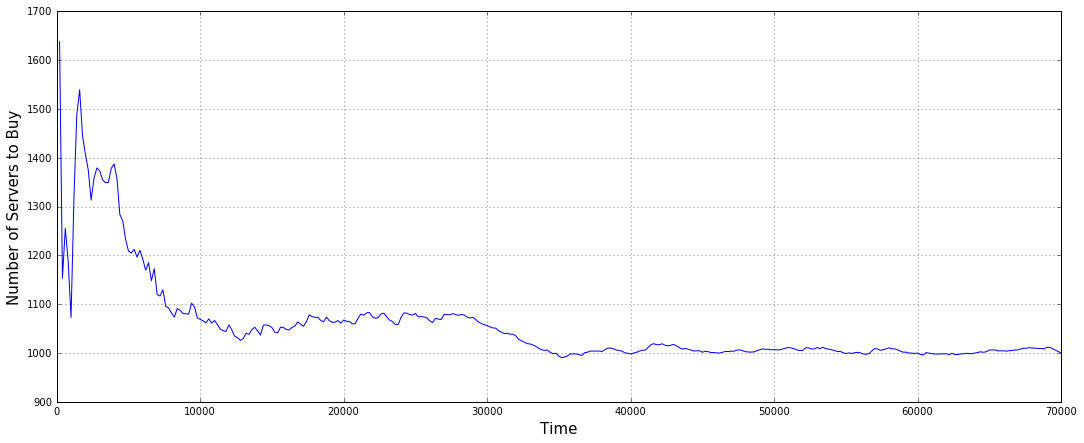

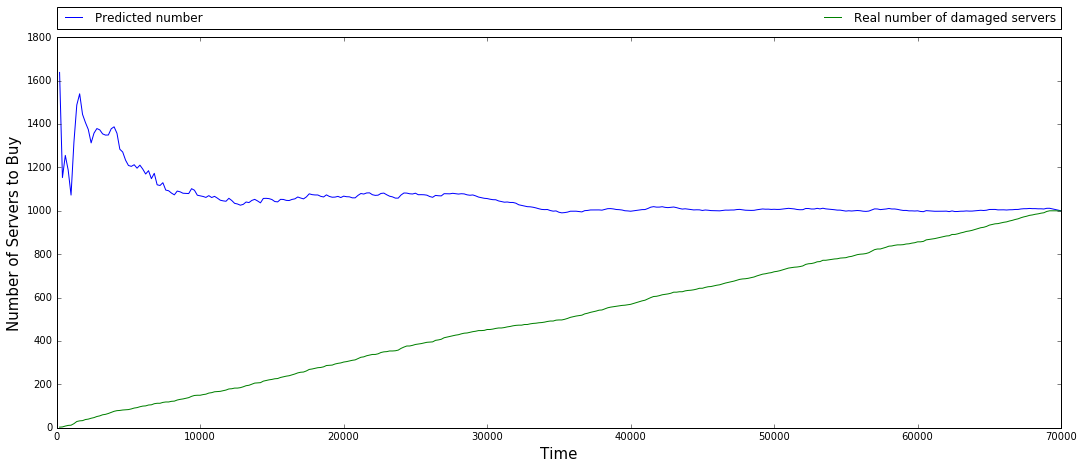

In [23]:
condition_expect = []  # Здесь будут предсказанные значения количества серверов
time = []  # Сюда записываю время с шагом t_0
quant = []  # Количество серверов, вышедших из строя, на данный момент

plt.figure(figsize=(18,7))
for i in range(t//t_0):
    time.append(t_0*(i+1))
    quant.append(shape(np.where(data <= time[-1]))[1])  # Нахожу это количество подсчетом
                                                        # числа записей времени, меньших
                                                        # текущего времени
    condition_expect.append(((t-time[-1])*est[quant[-1]-1]) + quant[-1])  # Предсказанное значение
    
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of Servers to Buy', fontsize=15)
plt.plot(time,condition_expect)
plt.grid()
plt.show()

plt.figure(figsize=(18,7))
plt.xlabel('Time', fontsize=15)
plt.ylabel('Number of Servers to Buy', fontsize=15)
plt.plot(time,condition_expect, label='Predicted number')
plt.plot(time,quant, color='g', label='Real number of damaged servers')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, \
       mode="expand", borderaxespad=0.)
plt.show()

Каждые $t_0=200$ секунд вывожу значение предсказания.

В самом конце оно совпадает с действительным значением N = 1000.

In [24]:
print('\n'.join(map(str,condition_expect)))

1637.53218541
1153.03741702
1255.27968819
1187.74150019
1072.48625837
1315.534249
1487.65375756
1539.15326911
1444.61244213
1407.20322234
1374.9692205
1312.95279233
1357.95933558
1379.01055923
1373.02480774
1354.47769677
1348.88199883
1349.32507889
1378.02031752
1387.04126344
1357.34317399
1283.72360534
1270.88084309
1233.23047978
1208.8747368
1204.76539754
1212.25979855
1196.38333281
1210.34100193
1192.01605338
1169.53196834
1184.84471033
1147.99999733
1172.70369785
1119.84208215
1116.64575808
1129.45549982
1095.53430323
1092.40438559
1081.59282461
1073.55991889
1090.94357688
1087.5419352
1080.95431648
1080.30969453
1079.47476452
1101.92897054
1094.81908763
1071.89473007
1068.83195688
1066.08336161
1061.71514547
1069.86680594
1061.18454279
1066.61571659
1058.24015512
1048.86526347
1045.80386846
1043.98311233
1057.58813311
1047.52966041
1034.36631384
1031.41018081
1025.80657021
1029.63575163
1040.5199748
1037.98811107
1047.77462691
1052.75018909
1045.41051675
1036.62244471
1056.9564297

In [25]:
for i in range(len(est)):
    print("lambda = {:.4f}, {:.4f} - bayes estimate, {}/{}".format(lmd, est[i], i+1, len(est)))

lambda = 0.0152, 0.2476 - bayes estimate, 1/1000
lambda = 0.0152, 0.0962 - bayes estimate, 2/1000
lambda = 0.0152, 0.0234 - bayes estimate, 3/1000
lambda = 0.0152, 0.0165 - bayes estimate, 4/1000
lambda = 0.0152, 0.0193 - bayes estimate, 5/1000
lambda = 0.0152, 0.0185 - bayes estimate, 6/1000
lambda = 0.0152, 0.0208 - bayes estimate, 7/1000
lambda = 0.0152, 0.0180 - bayes estimate, 8/1000
lambda = 0.0152, 0.0180 - bayes estimate, 9/1000
lambda = 0.0152, 0.0184 - bayes estimate, 10/1000
lambda = 0.0152, 0.0170 - bayes estimate, 11/1000
lambda = 0.0152, 0.0154 - bayes estimate, 12/1000
lambda = 0.0152, 0.0164 - bayes estimate, 13/1000
lambda = 0.0152, 0.0175 - bayes estimate, 14/1000
lambda = 0.0152, 0.0185 - bayes estimate, 15/1000
lambda = 0.0152, 0.0171 - bayes estimate, 16/1000
lambda = 0.0152, 0.0179 - bayes estimate, 17/1000
lambda = 0.0152, 0.0183 - bayes estimate, 18/1000
lambda = 0.0152, 0.0188 - bayes estimate, 19/1000
lambda = 0.0152, 0.0196 - bayes estimate, 20/1000
lambda = 